# Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')


import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report


In [2]:
df =pd.read_csv("gas_turbines.csv")
df.info()
pd.set_option("display.max_columns",None)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


From the above Descriptive analysis :
    There are no null ,invalid or empty values.
    Since the Mean=Mode hence we can say its a normal distribution.
    As well wrt 5 point analysis there dont seem to be any outliers Hence the dataset is good to go without any cleaning and      cleansing.

In [8]:
# reordering the columns so that the the label column is in the end.

column_order = [col for col in df.columns if col != 'TEY'] + ['TEY']
df = df[column_order]

x=df.iloc[:,:-1]
y=df.iloc[:,-1]



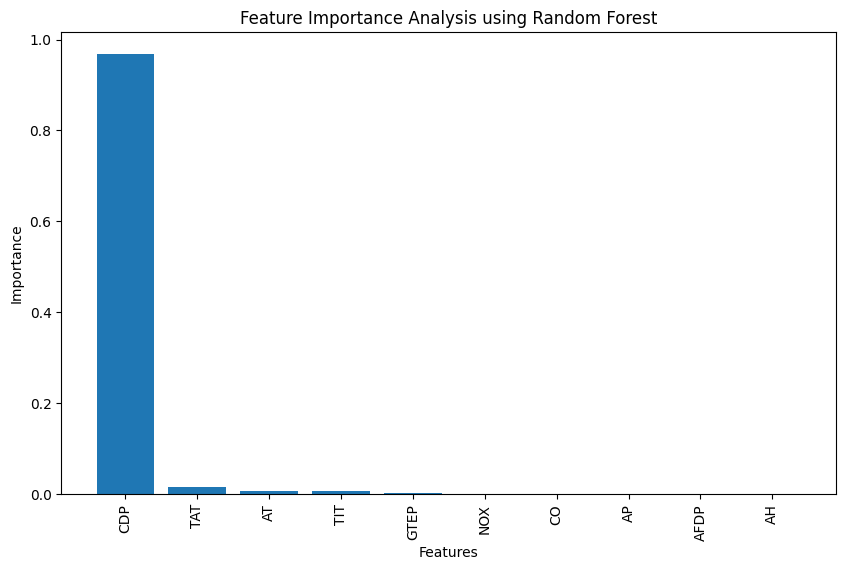

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
# Checking Feature importance
# Feature Importance Analysis using Random Forest
rf = RandomForestRegressor()
rf.fit(x, y)
importance = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importance)[::-1]
sorted_importance = importance[indices]
sorted_columns = df.columns[:-1][indices]

# Bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(sorted_columns, sorted_importance)
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Analysis using Random Forest')
plt.show()

Here as we can see After NOX all the 5 donot contribute to the explaination of our y variable hence for other models these can be dropped.
But since in Neural network the internal weightcalculation and importance is checked and then the model training will be done hence we dont not need to 
take that efforts so we can now move on to building the model.

In [11]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Feature importance using Principal Component Analysis (PCA)
stdalgo=StandardScaler()
stddata=stdalgo.fit_transform(x)
stddf=pd.DataFrame(stddata)
cov=stddf.cov()
values,vectors=np.linalg.eig(cov)
values

PCAalgo=PCA()
PCAalgo.fit_transform(stddf)
PCAalgo.explained_variance_ratio_
np.cumsum(PCAalgo.explained_variance_ratio_)

array([0.43505842, 0.66045762, 0.75893546, 0.84799611, 0.92116533,
       0.95919673, 0.9876638 , 0.9995997 , 0.99988223, 1.        ])

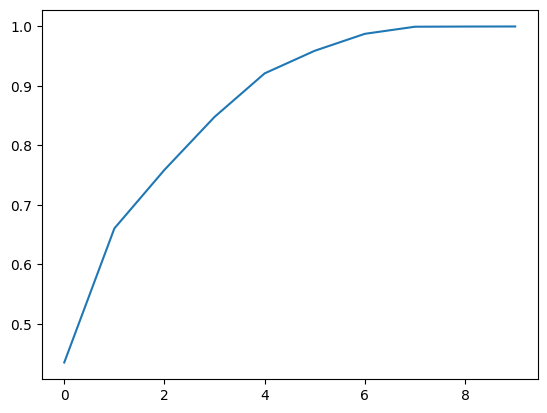

In [12]:
# Scree plot
plt.plot(np.cumsum(PCAalgo.explained_variance_ratio_))

The scree plot confirms that with 5 principle components our model accuracy will reach to more that 90%

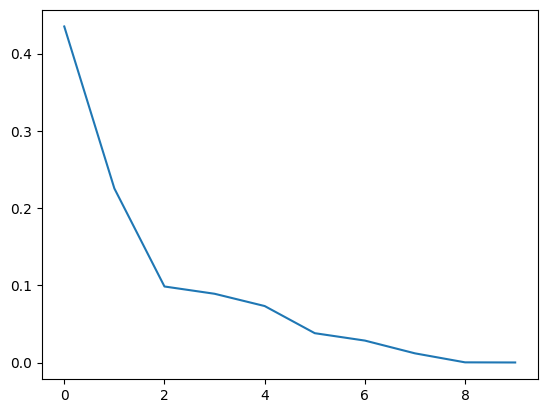

In [13]:
# Elbow Plot
plt.plot(PCAalgo.explained_variance_ratio_)

# Model Building

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(stddf,y,test_size=0.20, random_state=1)
#Initialize model
ann = Sequential()

#Add 2 hidden layer
ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))

#Add output layer
ann.add(Dense(units=1))

#Establish the connection between the layers
ann.compile(optimizer='adam',loss = 'mse')

#Fit the data
ann.fit(xtrain,ytrain, epochs = 100, validation_data = (xtest,ytest))











Epoch 1/100
376/376 [==============================] - 3s 2ms/step - loss: 9839.7158 - val_loss: 1237.9465
Epoch 2/100
376/376 [==============================] - 1s 1ms/step - loss: 568.0771 - val_loss: 343.5695
Epoch 3/100
376/376 [==============================] - 1s 1ms/step - loss: 245.2146 - val_loss: 196.5083
Epoch 4/100
376/376 [==============================] - 1s 2ms/step - loss: 144.2614 - val_loss: 129.0351
Epoch 5/100
376/376 [==============================] - 1s 2ms/step - loss: 97.7019 - val_loss: 93.1105
Epoch 6/100
376/376 [==============================] - 1s 2ms/step - loss: 72.0805 - val_loss: 69.9424
Epoch 7/100
376/376 [==============================] - 1s 2ms/step - loss: 55.3523 - val_loss: 53.8510
Epoch 8/100
376/376 [==============================] - 1s 2ms/step - loss: 42.9392 - val_loss: 41.1959
Epoch 9/100
376/376 [==============================] - 1s 2ms/step - loss: 33.3033 - val_loss: 32.0828
Epoch 10/100
376/376 [==============================] - 1s 2ms/

376/376 [==============================] - 1s 2ms/step - loss: 0.3912 - val_loss: 0.5219
Epoch 82/100
376/376 [==============================] - 1s 2ms/step - loss: 0.3976 - val_loss: 0.4469
Epoch 83/100
376/376 [==============================] - 1s 1ms/step - loss: 0.3900 - val_loss: 0.4956
Epoch 84/100
376/376 [==============================] - 1s 2ms/step - loss: 0.3924 - val_loss: 0.3933
Epoch 85/100
376/376 [==============================] - 1s 2ms/step - loss: 0.3861 - val_loss: 0.3904
Epoch 86/100
376/376 [==============================] - 1s 2ms/step - loss: 0.3878 - val_loss: 0.4167
Epoch 87/100
376/376 [==============================] - 1s 2ms/step - loss: 0.4000 - val_loss: 0.3897
Epoch 88/100
376/376 [==============================] - 1s 1ms/step - loss: 0.3820 - val_loss: 0.3974
Epoch 89/100
376/376 [==============================] - 1s 2ms/step - loss: 0.3931 - val_loss: 0.4002
Epoch 90/100
376/376 [==============================] - 1s 2ms/step - loss: 0.3751 - val_loss: 

In [16]:
#'history.history' function stores the training loss and test loss in dictionary format.
loss = pd.DataFrame(ann.history.history)
loss

,loss,val_loss
0,9839.715820,1237.946533
1,568.077087,343.569489
2,245.214615,196.508347
3,144.261353,129.035110
4,97.701874,93.110542
...,...,...
95,0.384646,0.427259
96,0.378916,0.426493
97,0.389936,0.523548
98,0.391150,0.377769


<Axes: >

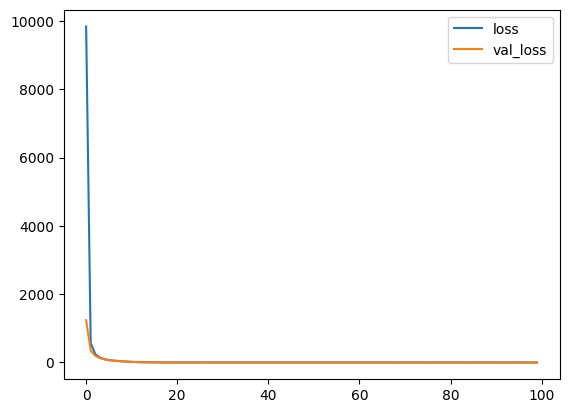

In [17]:
loss.plot()

In [19]:
from sklearn.metrics import r2_score
yp = ann.predict(xtest)
yp

94/94 [==============================] - 0s 1ms/step


array([[164.41304],
       [139.61937],
       [109.67295],
       ...,
       [156.4978 ],
       [135.26761],
       [165.1626 ]], dtype=float32)

In [20]:
r2_score(ytest,yp)

0.9984083695570287

we have got a R2 score of 0.9984083695570287 which suggests an extremely high level of correlation between the predicted values (yp) and the actual values (ytest). This indicates that the ANN regression model used to predict ytest is performing exceptionally well and is able to explain approximately 99.84% of the variance in ytest. The closer the R2 score is to 1, the better the model's fit.

Based on this high R2 score, We can conclude that the regression model used to predict ytest is highly accurate and reliable